In [1]:
# ÌïµÏã¨ Ìå®ÌÇ§ÏßÄ(Ïä§Ìä∏Î¶¨Î∞ç Ìò∏Ìôò Î≤ÑÏ†Ñ)
!pip -q install "datasets<3.0.0" "evaluate<0.5.0" "transformers>=4.38,<4.45" \
                huggingface_hub torchaudio jiwer soundfile

# fsspec/gcsfs Ï∂©Îèå Ï†ïÎ¶¨
!pip -q install -U fsspec==2025.3.0 gcsfs

import datasets, evaluate, transformers, fsspec, gcsfs, sys
print("datasets:", datasets.__version__)    # ‚Üê 2.x Ïó¨Ïïº OK
print("evaluate:", evaluate.__version__)    # ‚Üê 0.4.x Í∂åÏû•
print("transformers:", transformers.__version__)
print("fsspec:", fsspec.__version__)
print("gcsfs:", gcsfs.__version__)
print("python:", sys.version)

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 527.3/527.3 kB 32.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.5/9.5 MB 89.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 177.6/177.6 kB 14.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 65.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from datasets import load_dataset, Audio, Dataset, concatenate_datasets
from transformers import (
    WhisperProcessor, WhisperForConditionalGeneration,
    Seq2SeqTrainingArguments, Seq2SeqTrainer, EarlyStoppingCallback
)
from dataclasses import dataclass
from typing import Any, Dict, List, Union
from evaluate import load as load_metric
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

import os, random, numpy as np, torch

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
print("Seed fixed to {}.".format(SEED))

Seed fixed to 42.


In [4]:
# 2) Îç∞Ïù¥ÌÑ∞ Î°úÎìú(Streaming -> in-memory)
n_train, n_val, n_test = 200, 100, 100
langs = ["ko","ja","en","de"]

def take_valid(gen, n, lang_code):
    out = []
    for ex in gen:
        if ex.get("audio") is not None and ex.get("sentence"):
            ex = dict(ex)
            ex["locale"] = lang_code
            out.append(ex)
            if len(out) >= n:
                break
    return out

train_data, val_data, test_data = [], [], []
for lang in langs:
    print(f"‚úÖ Loading {lang}...")
    ds_tr = load_dataset("mozilla-foundation/common_voice_16_1", lang, split="train",      streaming=True)
    ds_va = load_dataset("mozilla-foundation/common_voice_16_1", lang, split="validation", streaming=True)
    ds_te = load_dataset("mozilla-foundation/common_voice_16_1", lang, split="test",       streaming=True)
    train_data += take_valid(ds_tr, n_train, lang)
    val_data   += take_valid(ds_va, n_val,   lang)
    test_data  += take_valid(ds_te, n_test,  lang)

random.shuffle(train_data); random.shuffle(val_data); random.shuffle(test_data)
train_dataset = Dataset.from_list(train_data)
val_dataset   = Dataset.from_list(val_data)
test_dataset  = Dataset.from_list(test_data)
print({"train": len(train_dataset), "val": len(val_dataset), "test": len(test_dataset)})

‚úÖ Loading ko...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for mozilla-foundation/common_voice_16_1 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_16_1.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 401it [00:00, 834.18it/s]
Reading metadata...: 235it [00:00, 459.43it/s]
Reading metadata...: 282it [00:00, 527.36it/s]


‚úÖ Loading ja...


Reading metadata...: 9616it [00:00, 15843.59it/s]
Reading metadata...: 6094it [00:01, 4486.75it/s]
Reading metadata...: 6094it [00:00, 10585.60it/s]


‚úÖ Loading en...


Reading metadata...: 1090061it [00:34, 31605.33it/s]
Reading metadata...: 16390it [00:01, 15694.69it/s]
Reading metadata...: 16390it [00:01, 13084.10it/s]


‚úÖ Loading de...


Reading metadata...: 576207it [00:19, 29905.92it/s]
Reading metadata...: 16173it [00:00, 19686.74it/s]
Reading metadata...: 16173it [00:01, 12588.88it/s]


{'train': 800, 'val': 400, 'test': 400}


In [5]:
# 3) Ï†ÑÏ≤òÎ¶¨
TARGET_SR = 16000
model_checkpoint = "openai/whisper-small"

processor = WhisperProcessor.from_pretrained(model_checkpoint)
feature_extractor = processor.feature_extractor
tokenizer = processor.tokenizer

train_dataset = train_dataset.cast_column("audio", Audio(sampling_rate=TARGET_SR))
val_dataset   = val_dataset.cast_column("audio",   Audio(sampling_rate=TARGET_SR))
test_dataset  = test_dataset.cast_column("audio",  Audio(sampling_rate=TARGET_SR))

def prepare_dataset(example):
    a = example["audio"]
    example["input_features"] = feature_extractor(a["array"], sampling_rate=TARGET_SR).input_features[0]
    example["labels"] = tokenizer(example["sentence"]).input_ids
    return example

keep_cols = {"input_features","labels","locale"}
proc_train_orig = train_dataset.map(prepare_dataset, remove_columns=[c for c in train_dataset.column_names if c not in keep_cols])
proc_val_orig   = val_dataset.map(  prepare_dataset, remove_columns=[c for c in val_dataset.column_names   if c not in keep_cols])
proc_test_orig  = test_dataset.map( prepare_dataset, remove_columns=[c for c in test_dataset.column_names  if c not in keep_cols])

for ds_ in (proc_train_orig, proc_val_orig, proc_test_orig):
    ds_.set_format(columns=list(keep_cols))

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device, "| Seed:", SEED)

preprocessor_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Device: cuda | Seed: 42


In [6]:
# 4) Î™®Îç∏ Î°úÎî© & Whisper generate() ÏïàÏ†Ñ ÏÑ∏ÌåÖ
model = WhisperForConditionalGeneration.from_pretrained(model_checkpoint).to(device)

# pad/eos/start/forced ÌîÑÎ°¨ÌîÑÌä∏ ÌôïÏ†ï
tok = processor.tokenizer
if tok.pad_token_id is None:
    tok.pad_token = tok.eos_token

start_id = tok.convert_tokens_to_ids("<|startoftranscript|>")
if start_id is None:
    start_id = processor.get_decoder_prompt_ids(language="english", task="transcribe")[0][1]

forced_ids_en = processor.get_decoder_prompt_ids(language="english", task="transcribe")

for cfg in (model.config, model.generation_config):
    cfg.pad_token_id = tok.pad_token_id
    cfg.eos_token_id = tok.eos_token_id
    cfg.decoder_start_token_id = start_id
    cfg.forced_decoder_ids = forced_ids_en

model.config.use_cache = False
model.config.suppress_tokens = []

# 5) Collator: ÎùºÎ≤® Ìå®Îî© & decoder_input_ids ÏÉùÏÑ±(Ïö∞Î¶¨Í∞Ä Î™ÖÏãú Ï†úÍ≥µ)
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True
    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # ÏûÖÎ†• ÌîºÏ≤ò
        input_features = [{"input_features": f["input_features"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # ÎùºÎ≤® Ìå®Îî© + -100 ÎßàÏä§ÌÇπ
        label_features = [{"input_ids": f["labels"]} for f in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels.contiguous()

        # decoder_input_ids (right-shift with <|startoftranscript|>)
        tok = self.processor.tokenizer
        start_id = tok.convert_tokens_to_ids("<|startoftranscript|>")
        if start_id is None:
            start_id = self.processor.get_decoder_prompt_ids(language="english", task="transcribe")[0][1]
        pad_id = tok.pad_token_id

        labels_clean = labels.clone()
        labels_clean[labels_clean == -100] = pad_id

        dec_inp = torch.full_like(labels_clean, fill_value=pad_id)
        dec_inp[:, 0] = start_id
        dec_inp[:, 1:] = labels_clean[:, :-1]

        batch["decoder_input_ids"] = dec_inp.contiguous()
        batch["decoder_attention_mask"] = (dec_inp != pad_id).long()
        batch["input_features"] = batch["input_features"].contiguous()
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

In [7]:
!apt-get -y install sox libsox-dev libsox-fmt-all

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0
  libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base libsox-fmt-mp3 libsox-fmt-oss
  libsox-fmt-pulse libsox3 libwavpack1
Suggested packages:
  libaudio2 libsndio6.1
The following NEW packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0
  libsox-dev libsox-fmt-all libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base
  libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse libsox3 libwavpack1 sox
0 upgraded, 17 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,157 kB of archives.
After this operation, 4,262 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao-common all 1.2.2+20180113-1.1ubuntu3 [6,568 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 liba

In [8]:
import numpy as np, torchaudio

def _to_tensor_1ch(x_np):
    x = torch.tensor(np.asarray(x_np, dtype=np.float32))
    if x.dim() == 1:
        x = x.unsqueeze(0)
    return x

def speed_perturb_np(wav_np, sr, rate: float):
    if rate == 1.0:
        return wav_np, sr
    try:
        wav = _to_tensor_1ch(wav_np)
        effects = [["tempo", str(rate)]]  # ÌîºÏπò Î≥¥Ï°¥
        aug, sr_out = torchaudio.sox_effects.apply_effects_tensor(wav, sr, effects)
        return aug.squeeze(0).numpy(), sr_out
    except Exception as e:
        print("[WARN][sox] tempo failed -> fallback(no-aug):", e)
        return wav_np, sr

train_raw_16k = train_dataset.cast_column("audio", Audio(sampling_rate=TARGET_SR))

def augment_copy(ds_raw, rate: float):
    def _aug(b):
        a = b["audio"]
        aug_np, sr_out = speed_perturb_np(a["array"], a["sampling_rate"], rate)
        b = dict(b)
        b["audio"] = {"array": aug_np, "path": None, "sampling_rate": sr_out}
        return b
    ds_aug = ds_raw.map(_aug)
    ds_proc = ds_aug.map(
        prepare_dataset,
        remove_columns=[c for c in ds_aug.column_names if c not in {"input_features","labels","locale"}]
    )
    ds_proc.set_format(columns=["input_features","labels","locale"])
    return ds_proc

# === ÏõêÎ≥∏ + 4Í∞ÄÏßÄ Î∞∞ÏÜç(0.7, 0.9, 1.1, 1.3) Ï¶ùÍ∞ïÏùÑ 1:1Î°ú ÏÑûÍ∏∞ ===
AUG_RATES = [0.7, 0.9, 1.1, 1.3]

mix_parts = [proc_train_orig]
size_per_rate = {}

k = len(proc_train_orig)
for r in AUG_RATES:
    ds_aug = augment_copy(train_raw_16k, r)            # Î∞∞ÏÜç rÎ°ú Ï¶ùÍ∞ï
    m = min(len(ds_aug), k)                            # ÏõêÎ≥∏Í≥º 1:1
    ds_sel = ds_aug.shuffle(seed=SEED).select(range(m))
    mix_parts.append(ds_sel)
    size_per_rate[r] = len(ds_sel)

proc_train_mix = concatenate_datasets(mix_parts).shuffle(seed=SEED)

print("=== Mix summary ===")
print("Train(orig):", k)
for r in AUG_RATES:
    print(f"Train({r} sel):", size_per_rate[r])
print("‚Üí Mixed:", len(proc_train_mix))

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

/tmp/ipython-input-3380328824.py:15: UserWarning: torchaudio.sox_effects.sox_effects.apply_effects_tensor has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  aug, sr_out = torchaudio.sox_effects.apply_effects_tensor(wav, sr, effects)


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

=== Mix summary ===
Train(orig): 800
Train(0.7 sel): 800
Train(0.9 sel): 800
Train(1.1 sel): 800
Train(1.3 sel): 800
‚Üí Mixed: 4000


In [9]:
# 7) Trainer ÏÑ§Ï†ï
args = Seq2SeqTrainingArguments(
    output_dir="./whisper-small-mix_all",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    num_train_epochs=8,
    weight_decay=0.01,
    label_smoothing_factor=0.1,
    warmup_ratio=0.1,
    lr_scheduler_type="linear",
    max_grad_norm=1.0,
    fp16=torch.cuda.is_available(),
    report_to="none",

    predict_with_generate=True,      # eval/predict Ïãú generate ÏÇ¨Ïö©
    generation_max_length=225,

    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,

    remove_unused_columns=False,
)

trainer_mixall = Seq2SeqTrainer(
    model=model,
    args=args,
    train_dataset=proc_train_mix,
    eval_dataset=proc_val_orig,
    tokenizer=processor.tokenizer,   # Ï§ëÏöî!
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

print("[sanity] before train:", trainer_mixall.state.global_step)
trainer_mixall.train()
print("[sanity] after  train:", trainer_mixall.state.global_step)

/usr/local/lib/python3.12/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


[sanity] before train: 0


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-cust

[sanity] after  train: 2000


In [10]:
# 8) ÌèâÍ∞Ä
LANG_NAME = {"ko":"korean", "ja":"japanese", "en":"english", "de":"german"}
wer_metric = load_metric("wer")
cer_metric = load_metric("cer")

def eval_on(ds_proc, trainer_obj, label, sample_k=10, show_samples=True):
    rows = []
    for lang in ["ko","ja","en","de"]:
        subset = ds_proc.filter(lambda x: x["locale"] == lang)
        if len(subset) == 0:
            print(f"[WARN] No samples for {lang} in {label}")
            rows.append({"set": label, "lang": lang, "WER": float("nan"), "CER": float("nan"), "N": 0})
            continue

        # Ïñ∏Ïñ¥Î≥Ñ ÌîÑÎ°¨ÌîÑÌä∏ Í∞ïÏ†ú (generate Ïãú ÏÇ¨Ïö©)
        forced_ids = processor.get_decoder_prompt_ids(language=LANG_NAME[lang], task="transcribe")
        trainer_obj.model.generation_config.forced_decoder_ids = forced_ids
        trainer_obj.model.generation_config.max_length = 225

        out = trainer_obj.predict(subset)  # predict_with_generate=True ‚Üí ÌÜ†ÌÅ∞ ÏãúÌÄÄÏä§ Î∞òÌôò

        # ÏòàÏ∏°/Ï†ïÎãµ ÎîîÏΩîÎî©
        preds = tokenizer.batch_decode(out.predictions, skip_special_tokens=True)
        label_ids = np.where(out.label_ids != -100, out.label_ids, tokenizer.pad_token_id)
        refs  = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

        wer = wer_metric.compute(predictions=preds, references=refs)
        cer = cer_metric.compute(predictions=preds, references=refs)
        rows.append({"set": label, "lang": lang, "WER": wer, "CER": cer, "N": len(refs)})

        if show_samples and sample_k > 0:
            print(f"\n[{label}] {lang.upper()} samples (k={min(sample_k, len(refs))})")
            for i, (p, r) in enumerate(zip(preds, refs)):
                if i >= sample_k: break
                print(f"#{i:02d} PRED: {p}")
                print(f"     REF : {r}")
                print("---")

    return pd.DataFrame(rows).sort_values("lang")

print(f"[CHECK] Evaluating on TEST set: size={len(proc_test_orig)} (val={len(proc_val_orig)})")
df_orig = eval_on(proc_test_orig, trainer_mixall, "test_orig", sample_k=10, show_samples=True)
display(df_orig)
df_orig.to_csv("/content/results_mixall_test_orig_ONLY.csv", index=False)
print("Saved -> /content/results_mixall_test_orig_ONLY.csv")

[CHECK] Evaluating on TEST set: size=400 (val=400)


Filter:   0%|          | 0/400 [00:00<?, ? examples/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



[test_orig] KO samples (k=10)
#00 PRED: Í∑∏Îü¨ÎÇò Ïã§Ï†úÎ°ú ÎΩëÏùÄ Ïà´ÏûêÎäî ÏßÄÎÇú Ï£ºÏóê ÎπÑÏπòÏßÄ Î™ªÌïú Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
     REF : Í∑∏Îü¨ÎÇò Ïã§Ï†úÎ°ú ÎΩëÏùÄ Ïà´ÏûêÎäî ÏßÄÎÇú Ï£ºÏóê ÎØ∏ÏπòÏßÄ Î™ªÌïú Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
---
#01 PRED: Ïã†ÏïïÎåÄÎäî Ïù¥Î†áÍ≤å ÎßêÌïòÎ©∞ Ïú†ÏÑúÎ∞©ÏùÑ Í≤¨Î°†Ïßà Ìï¥ Î≥¥ÏïòÎã§.
     REF : Ïã±ÏïóÎåÄÎäî Ïù¥Î†áÍ≤å ÎßêÌïòÎ©∞ Ïú†ÏÑúÎ∞©ÏùÑ Í≥ÅÎààÏßàÌï¥ Î≥¥ÏïòÎã§.
---
#02 PRED: Ïã†Ï≤†Ïù¥Îäî Ïñ¥Ï∞® Î≥¥Î©¥ Í∞êÏ†ïÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÍ∞ôÏù¥ ÏïàÏïÑÎ≥¥ÏóàÎã§.
     REF : Ïã†Ï≤†Ïù¥Îäî Ïñ¥Ï∞å Î≥¥Î©¥ Í∞êÏ†ïÏùÑ Í∞ÄÏßÑ ÏÇ¨Îûå Í∞ôÏßÄ ÏïäÏïÑ Î≥¥ÏòÄÎã§.
---
#03 PRED: ÎÇ¥Îã§Î≥¥ÎãàÍπå Ïñ∏ÎçïÏñ¥Î†§Ïõ†Îçò ÏßëÏóê Î∂àÏù¥ Î∂ôÏúºÎ©∞ ÏÇ¨ÎûåÎì§Ïù¥ ÏôîÎã§Í∞îÎã§ ÏïºÎã®Ïù¥ÏóàÏäµÎãàÎã§.
     REF : ÎÇ¥Îã§Î≥¥ÎãàÍπå Ïñ∏Îçï ÏïÑÎûò Ïñ¥Îñ§ ÏßëÏóê Î∂àÏù¥ Î∂ôÏúºÎ©∞ ÏÇ¨ÎûåÎì§Ïù¥ ÏôîÎã§Í∞îÎã§ ÏïºÎã®Ïù¥ÏóàÏäµÎãàÎã§.
---
#04 PRED: Ïù∏Î†•ÌôîÍ∞Ä Ïïà Î¨¥Í±∞ÏõåÏßÄÎÑ§ Í∑∏Ïùò Î™∏ÏùÄ Ïù¥ÏÉÅÌïòÍ≤åÎèÑ Í∞ÄÎ≤ºÏõåÏ°åÍ≥†
     REF : Ïù∏Î†•Í±∞Í∞Ä Î¨¥Í±∞ÏõåÏßÄÎß§ Í∑∏Ïùò Î™∏ÏùÄ Ïù¥ÏÉÅÌïòÍ≤åÎèÑ Í∞ÄÎ≤ºÏõåÏ°åÍ≥†
-

Filter:   0%|          | 0/400 [00:00<?, ? examples/s]


[test_orig] JA samples (k=10)
#00 PRED: Á¶èÂ≥∂ÁúåÂ∫ÉÈáéÁî∫
     REF : Á¶èÂ≥∂ÁúåÂ∫ÉÈáéÁî∫
---
#01 PRED: „Å†„Åå„Åì„Å®„Çè„Çã
     REF : „Å†„ÅåÊñ≠„Çã
---
#02 PRED: „Åù„Åó„Å¶„ÅÑ„Åè„ÇâË¶ãËàû„ÅÑ„Å®„Åó„Å¶„ÇÇ„ÄÅÂêõ„ÅåÊÇ™„Åë„Çå„Å∞ÊÇ™„ÅÑ„Åª„Å©Êõ∏„ÅÑ„Å¶„Åù„ÅÆÈçµ„Çí„Åò„Å£„Å®Ë¶ã„Å§„ÇÅ„Å™„ÅÑ„Åß„ÅØ„ÅÑ„Çâ„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ
     REF : „Åù„Åó„Å¶„ÄÅ„ÅÑ„Åè„ÇâË¶ã„Åæ„ÅÑ„Å®„Åó„Å¶„ÇÇ„ÄÅ„Åç„Åø„ÅåÊÇ™„Åë„Çå„Å∞ÊÇ™„ÅÑ„Åª„Å©„ÄÅ„Åã„Åà„Å£„Å¶„Åù„ÅÆÂΩ±„Çí„ÄÅ„Åò„Å£„Å®Ë¶ã„Å§„ÇÅ„Å™„ÅÑ„Åß„ÅØ„ÅÑ„Çâ„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü„ÄÇ
---
#03 PRED: „Éã„Éº„Éä„Ç∂„ÇØÈÅ∏Êâã„ÅÆÂë®Âà∞„ÅØ„Éè„Éé„Éï„Ç°„Éº„Åß„ÅÇ„Çã
     REF : „Éã„Éº„ÉÄ„Éº„Ç∂„ÇØ„Çª„É≥Â∑û„ÅÆÂ∑ûÈÉΩ„ÅØ„Éè„Éé„Éº„Éï„Ç°„Éº„Åß„ÅÇ„Çã
---
#04 PRED: „Åù„Åì„ÅßËá™ÂàÜ„ÅßÂá∫„Åã„Åë„Å¶„ÅÑ„Å£„Å¶„ÄÅË™ø„ÅπÂßã„ÇÅ„Åæ„Åó„Åü„ÄÇÂΩº„ÅØ„Åï„Çì„Åñ„ÇìÊé¢„ÅóÂõû„Çä„Åæ„Åó„Åü„ÄÇ
     REF : „Åù„Åì„ÅßËá™ÂàÜ„ÅßÂá∫„Åã„Åë„Å¶Ë°å„Å£„Å¶„ÄÅË™ø„Åπ„ÅØ„Åò„ÇÅ„Åæ„Åó„Åü„ÄÇ„Åã„Çå„ÅØ„Åï„Çì„Åñ„Çì„Åï„Åå„Åó„Åæ„Çè„Çä„Åæ„Åó„Åü„ÄÇ
---
#05 PRED: ok
     REF : „Äå„Åä„ÇÑ„Åä„ÇÑ„ÄÅÊ±ö„ÅÑ„ÇÑ„Å§„ÇÅ„Åæ„ÅüÂá∫„Å¶Êù•„ÇÑ„Åå„Å£„Åü„Å™„ÄÇ„Äç„Å®

Filter:   0%|          | 0/400 [00:00<?, ? examples/s]


[test_orig] EN samples (k=10)
#00 PRED: Hello, this is one of the most popular debate events of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the class of the cl

Filter:   0%|          | 0/400 [00:00<?, ? examples/s]


[test_orig] DE samples (k=10)
#00 PRED: Wenn nicht, dann l√§sst man sie ja genau hinter dem Platz.
     REF : Wenn nicht, dann legt man sie irgendwo hin, wo Platz ist.
---
#01 PRED: Wie ist die derzeitige Verkehrssituation?
     REF : Wie ist die derzeitige Verkehrssituation?
---
#02 PRED: Aus dem Prozessamen der Hexe verfolgen wird ein kmaler Tentisch an den Tippen bekannt.
     REF : Aus den Prozessakten der Hexenverfolgung sind keine authentischen Rezepte bekannt.
---
#03 PRED: Er errang den ersten Platz in seiner Hupraumklasse.
     REF : Er errang den ersten Platz in seiner Hubraumklasse.
---
#04 PRED: Achtung schrekt.
     REF : Ach du Schreck!
---
#05 PRED: Aubschlie√üend m√∂chte ich Ihnen gerne etwas sehr wichtiges mitteilen.
     REF : Abschlie√üend m√∂chte ich Ihnen gerne etwas sehr Wichtiges mitteilen.
---
#06 PRED: Die sofortestrechen erschienen mit Modemagazinen wie der Waukart das Basar und die Kl√§r.
     REF : Ihre Fotostrecken erschienen in Modemagazinen wie der Vogue

set lang       WER       CER    N
3  test_orig   de  0.406436  0.155292  100
2  test_orig   en  0.506145  0.307831  100
1  test_orig   ja  0.855856  0.433981  100
0  test_orig   ko  0.443258  0.180409  100

Saved -> /content/results_mixall_test_orig_ONLY.csv


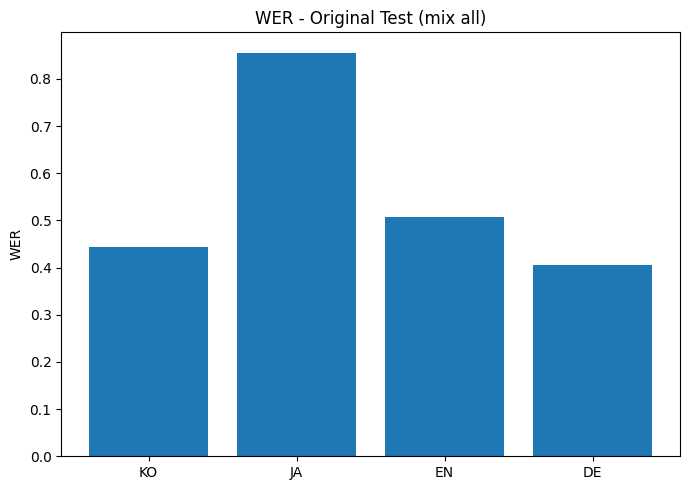

In [11]:
import matplotlib.pyplot as plt

# 9) ÏãúÍ∞ÅÌôî
def bar_lang(df, label):
    plt.figure(figsize=(7,5))
    langs = ["ko","ja","en","de"]
    vals = []
    for l in langs:
        row = df[df["lang"]==l]
        vals.append(float(row["WER"].values[0]) if len(row) else float("nan"))
    plt.bar([l.upper() for l in langs], vals)
    plt.title(f"WER - {label}")
    plt.ylabel("WER")
    plt.tight_layout()
    plt.show()

bar_lang(df_orig, "Original Test (mix all)")